In [2]:
from scsim import ScSim, SimulationConfig

In [14]:
config = SimulationConfig(
    ngenes=25,
    ncells=1000,
    ngroups=13,
    seed=42,
    libloc=7.64,
    libscale=0.78,
    mean_rate=7.68,
    mean_shape=0.34,
    expoutprob=0.00286,
    expoutloc=6.15,
    expoutscale=0.49,
    diffexpprob=0.025,
    diffexpdownprob=0.0,
    diffexploc=1.0,
    diffexpscale=1.0,
    bcv_dispersion=0.448,
    bcv_dof=22.087,
    ndoublets=0,
    nproggenes=4,
    progdownprob=0.0,
    progdeloc=1.0,
    progdescale=1.0,
    progcellfrac=0.35,
    proggroups=list(range(1, 5)),
    minprogusage=0.1,
    maxprogusage=0.7,
)

In [15]:
simulator = ScSim(config).simulate()

In [16]:
simulator.counts.max()

Gene1       43
Gene2      747
Gene3      226
Gene4     2029
Gene5        5
Gene6      766
Gene7     4723
Gene8     1630
Gene9        5
Gene10     489
Gene11      25
Gene12    2038
Gene13     182
Gene14    2955
Gene15    1123
Gene16      54
Gene17     861
Gene18     262
Gene19      28
Gene20     786
Gene21     850
Gene22    3045
Gene23     123
Gene24    6308
Gene25     167
dtype: int64

In [17]:
# Get top 1000 genes with most expression
gene_totals = simulator.counts.sum(axis=0)
top_1000_genes = gene_totals.nlargest(1000)
print("Top 1000 genes with highest total expression:")
print(top_1000_genes.head(10))  # Show first 10 for preview

Top 1000 genes with highest total expression:
Gene24    715990
Gene7     506670
Gene14    211814
Gene4     189680
Gene12    177123
Gene22    147955
Gene8     126294
Gene20    102357
Gene6      79339
Gene17     76789
dtype: int64


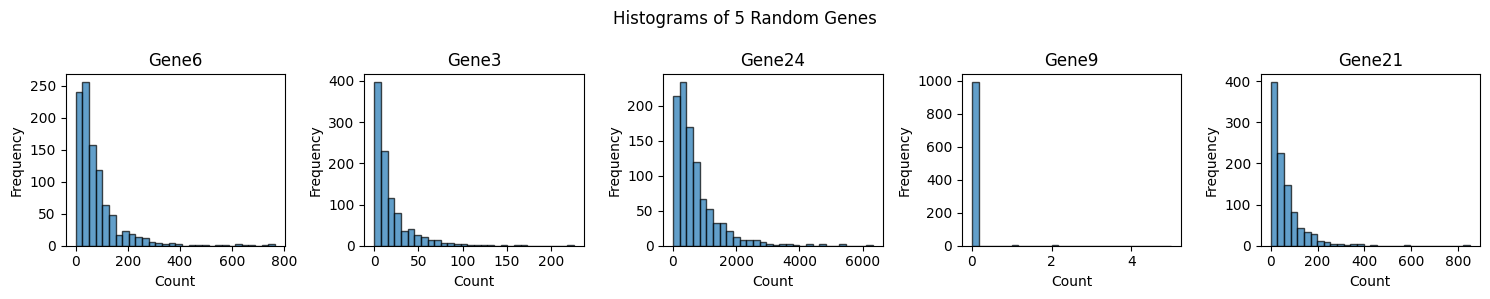

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random columns
np.random.seed(42)  # For reproducibility
random_genes = np.random.choice(top_1000_genes.index, size=5, replace=False)

# Create histogram plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Histograms of 5 Random Genes")

for i, gene in enumerate(random_genes):
    axes[i].hist(simulator.counts[gene], bins=30, alpha=0.7, edgecolor="black")
    axes[i].set_title(f"{gene}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [19]:
simulator.geneparams["prog_gene"].sum()

np.int64(4)

<Axes: >

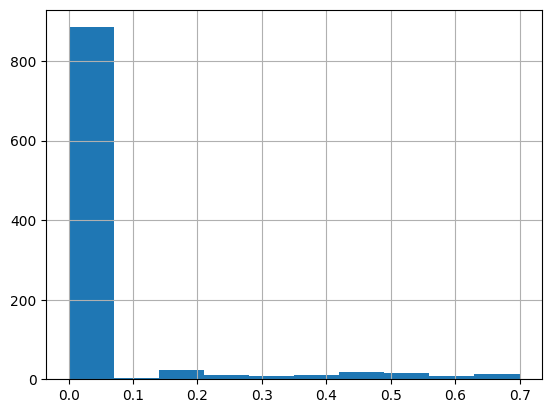

In [20]:
simulator.cellparams["program_usage"].hist()

In [21]:
simulator.cellparams

,group,libsize,has_program,program_usage
Cell1,11,1165.715297,False,0.000000
Cell2,6,4276.965538,False,0.000000
Cell3,12,2136.655985,False,0.000000
Cell4,10,1668.064607,False,0.000000
Cell5,2,1914.435527,False,0.000000
...,...,...,...,...
Cell996,6,1683.622449,False,0.000000
Cell997,9,1729.899388,False,0.000000
Cell998,1,1172.833095,False,0.000000
Cell999,13,3036.234021,False,0.000000


In [22]:
simulator.geneparams

,BaseGeneMean,is_outlier,outlier_ratio,gene_mean,prog_gene,prog_genemean,group1_DEratio,group1_genemean,group2_DEratio,group2_genemean,...,group9_DEratio,group9_genemean,group10_DEratio,group10_genemean,group11_DEratio,group11_genemean,group12_DEratio,group12_genemean,group13_DEratio,group13_genemean
Gene1,0.000399,False,1.0,0.000399,False,0.000399,1.0,0.000399,1.000000,0.000399,...,1.0,0.000399,1.0,0.000399,1.0,0.000399,1.0,0.000399,1.0,0.000399
Gene2,0.009756,False,1.0,0.009756,False,0.009756,1.0,0.009756,1.000000,0.009756,...,1.0,0.009756,1.0,0.009756,1.0,0.009756,1.0,0.009756,1.0,0.009756
Gene3,0.003069,False,1.0,0.003069,False,0.003069,1.0,0.003069,1.000000,0.003069,...,1.0,0.003069,1.0,0.003069,1.0,0.003069,1.0,0.003069,1.0,0.003069
Gene4,0.031075,False,1.0,0.031075,False,0.031075,1.0,0.031075,1.000000,0.031075,...,1.0,0.031075,1.0,0.031075,1.0,0.031075,1.0,0.031075,1.0,0.031075
Gene5,0.0,False,1.0,0.0,False,0.0,1.0,0.0,3.144060,0.000001,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Gene6,0.012976,False,1.0,0.012976,False,0.012976,1.0,0.012976,1.000000,0.012976,...,1.0,0.012976,1.0,0.012976,1.0,0.012976,1.0,0.012976,1.0,0.012976
Gene7,0.0831,False,1.0,0.0831,False,0.0831,1.0,0.0831,1.000000,0.0831,...,1.0,0.0831,1.0,0.0831,1.0,0.0831,1.0,0.0831,1.0,0.0831
Gene8,0.020172,False,1.0,0.020172,False,0.020172,1.0,0.020172,1.000000,0.020172,...,1.0,0.020172,1.0,0.020172,1.0,0.020172,1.0,0.020172,1.0,0.020172
Gene9,0.000002,False,1.0,0.000002,False,0.000002,1.0,0.000002,1.000000,0.000002,...,1.0,0.000002,1.0,0.000002,1.0,0.000002,1.0,0.000002,1.0,0.000002
Gene10,0.005684,False,1.0,0.005684,False,0.005684,1.0,0.005684,1.000000,0.005684,...,1.0,0.005684,1.0,0.005684,1.0,0.005684,1.0,0.005684,1.0,0.005684
